In [8]:
import azure.cosmos.documents as documents
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.exceptions as exceptions
from azure.cosmos.partition_key import PartitionKey
import requests, os, json
import matplotlib.pyplot as plt

In [2]:
# Define un diccionario llamado "settings" que contiene la configuración para Azure Cosmos DB
settings = {
    'database_id': os.environ.get('COSMOS_DATABASE', 'Software'),  # Obtiene el nombre de la base de datos de la variable de entorno COSMOS_DATABASE, si no está definida, utiliza un valor predeterminado
    'container_id': os.environ.get('COSMOS_CONTAINER','Registros_cvss')  # Obtiene el nombre del contenedor de la variable de entorno COSMOS_CONTAINER, si no está definida, utiliza un valor predeterminado
}

# Asigna los valores de la configuración a variables individuales para facilitar su uso
HOST = settings['host']  # La URL del servicio de Azure Cosmos DB
MASTER_KEY = settings['master_key']  # La clave maestra para acceder al servicio de Azure Cosmos DB
DATABASE_ID = settings['database_id']  # El ID de la base de datos en Azure Cosmos DB
CONTAINER_ID = settings['container_id']  # El ID del contenedor en Azure Cosmos DB


In [3]:
client = cosmos_client.CosmosClient(HOST, {'masterKey': MASTER_KEY}, user_agent="CosmosDBPythonQuickstart", user_agent_overwrite=True)

In [4]:
def consumeApi(vulnId):
    endPoint = f'https://services.nvd.nist.gov/rest/json/cves/2.0?cveId={vulnId}'
    headers = {
    }
    infoVuln = requests.get(endPoint,headers = headers)
    return infoVuln


In [6]:
db = client.get_database_client(DATABASE_ID)
container = db.get_container_client(CONTAINER_ID)
query = "SELECT * FROM c WHERE c.partitionKey = '1'"
response = container.query_items(query, enable_cross_partition_query=True)
HIGH = 0
MEDIUM = 0
LOW = 0
OTHER = 0
for response in response:
    #print(json.dumps(response['vulnerabilidad']['cve_id'],indent=2))
    impact = consumeApi(response['vulnerabilidad']['cve_id'])
    impact = impact.json()["vulnerabilities"][0]["cve"]["metrics"]["cvssMetricV2"][0]["baseSeverity"]
    if impact == "HIGH":
        HIGH =HIGH + 1
    elif impact == "MEDIUM":
        MEDIUM =MEDIUM + 1
    elif impact == "LOW":
        LOW =LOW + 1
    else:
        OTHER = OTHER + 1
    print("HIGH: ",HIGH," MEDIUM: ",MEDIUM," LOW: ",LOW," OTHER: ",OTHER)
    #print(json.dumps(impact.json()['baseSeverity'],indent=2))

HIGH:  1  MEDIUM:  0  LOW:  0  OTHER:  0
HIGH:  1  MEDIUM:  1  LOW:  0  OTHER:  0
HIGH:  2  MEDIUM:  1  LOW:  0  OTHER:  0
HIGH:  2  MEDIUM:  2  LOW:  0  OTHER:  0
HIGH:  2  MEDIUM:  3  LOW:  0  OTHER:  0
HIGH:  3  MEDIUM:  3  LOW:  0  OTHER:  0
HIGH:  3  MEDIUM:  4  LOW:  0  OTHER:  0
HIGH:  4  MEDIUM:  4  LOW:  0  OTHER:  0
HIGH:  5  MEDIUM:  4  LOW:  0  OTHER:  0
HIGH:  6  MEDIUM:  4  LOW:  0  OTHER:  0


KeyError: 'cvssMetricV2'

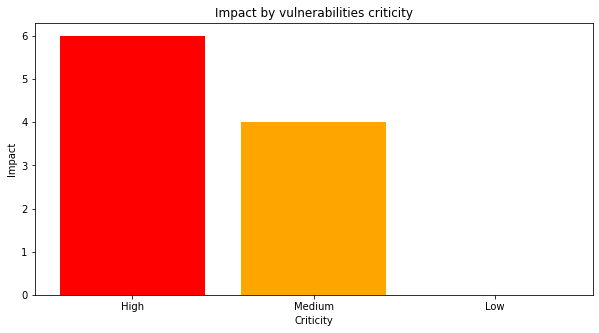

In [9]:
# Datos para el gráfico
categorias = ['High', 'Medium', 'Low']
valores = [HIGH, MEDIUM, LOW]

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(categorias, valores, color=['red', 'orange', 'green'])

# Añadir título y etiquetas a los ejes
plt.title('Impact by vulnerabilities criticity')
plt.xlabel('Criticity')
plt.ylabel('Impact')

# Mostrar el gráfico
plt.show()